In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gdcm


     ---------------------------------------- 4.0/4.0 MB 8.8 MB/s eta 0:00:00


In [4]:
pip install pylibjpeg[all]

     -------------------------------------- 564.4/564.4 kB 5.1 MB/s eta 0:00:00
     -------------------------------------- 138.2/138.2 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import torch
from torch.utils.data import Dataset
import os
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



class MyDataset(Dataset):

    def __init__(self, csv_path, img_dir, transform=None):
    
        df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.img_names = df['image_id']
        df_temp = df.drop(['image_id','rad_ID'],axis = 1)
        list_of_cols = list(df_temp.columns)
        df_x = list(df.sum(axis = 1))
        df['sum'] = df_x
        df = df[df['sum']<=1]
        n1,n2 = df.shape
        Y = []
        print(list_of_cols)
        for ind in df.index:
            for j in list_of_cols:
                if(df[j][ind] == 1):
                    Y.append(j)
                    break
        

        self.y = np.array(Y)
        self.transform = transform

    def __getitem__(self, index):
        img = pydicom.dcmread(os.path.join(self.img_dir,self.img_names[index])+'.dicom')
        plt.imshow(img.pixel_array, cmap=plt.cm.bone) 
        print(img.pixel_array.max(), img.pixel_array.min())
        # sns.kdeplot(img.pixel_array.reshape(-1))
        # plt.show()
        
        if self.transform is not None:
            img = self.transform(img)
        
        label = self.y[index]
        return img, label

    def __len__(self):
        return len(self.y)

In [16]:
train_data = MyDataset('image_labels_train.csv','train')


['No finding', 'Bronchitis', 'Brocho-pneumonia', 'Other disease', 'Bronchiolitis', 'Situs inversus', 'Pneumonia', 'Pleuro-pneumonia', 'Diagphramatic hernia', 'Tuberculosis', 'Congenital emphysema', 'CPAM', 'Hyaline membrane disease', 'Mediastinal tumor', 'Lung tumor']


3689 0


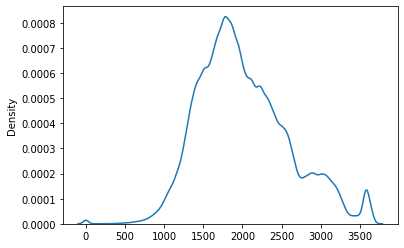

c:\Users\shriv\AppData\Local\Programs\Python\Python38\lib\site-packages\pydicom\valuerep.py:290: UserWarning: Invalid value for VR UI: '40414c05687cdb156823c156967b13f0'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


(Dataset.file_meta -------------------------------
 (0002, 0000) File Meta Information Group Length  UL: 160
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
 (0002, 0003) Media Storage SOP Instance UID      UI: 40414c05687cdb156823c156967b13f0
 (0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical (Process 14)
 (0002, 0012) Implementation Class UID            UI: 1.2.3.4
 (0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_364'
 -------------------------------------------------
 (0010, 0040) Patient's Sex                       CS: 'M'
 (0010, 1010) Patient's Age                       AS: '002M'
 (0010, 1030) Patient's Weight                    DS: None
 (0028, 0002) Samples per Pixel                   US: 1
 (0028, 0004) Photometric Interpretation          CS: 'MONOCHROME1'
 (0028, 0010) Rows                                U

In [17]:
train_data.__getitem__(1)

In [4]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [5]:
from torchvision import transforms
from torch.utils.data import DataLoader


# Note that transforms.ToTensor()
# already divides pixels by 255. internally

custom_transform = transforms.Compose([#transforms.Lambda(lambda x: x/255.), # not necessary
                                       transforms.ToTensor()
                                      ])



train_loader = DataLoader(dataset=train_data,
                          batch_size=32,
                          drop_last=True,
                          shuffle=True, # want to shuffle the dataset
                          num_workers=0) # number processes/CPUs to use